In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDRegressor, LinearRegression


In [2]:
# Loading the dataset into python
df = pd.read_excel('bedcdataset.xlsx')
df.head(10)

,globalaccountnumber,displaycode,tariffclassname,tariffrates,previousreading,presentreading,readconsumption,cap,energycharges,billedamount,previouspayments,updateddssname
0,1828477364,D,E Non MD,41.21,NaN,NaN,100.0,287.0,4121.00,4430.07500,4400.0,NEW URORA QUARTER
1,7595355255,D,E Non MD,41.21,NaN,NaN,50.0,240.0,2060.50,2215.03750,5000.0,STREET 3
2,198240302,D,E Non MD,41.21,NaN,NaN,50.0,240.0,2060.50,2215.03750,5000.0,STREET 3
3,4867087435,D,E Non MD,41.21,NaN,NaN,50.0,240.0,2060.50,2215.03750,2000.0,STREET 3
4,837058,D,E Non MD,41.21,NaN,NaN,213.0,224.0,8777.73,9436.05975,7000.0,BEN IMADE
5,157947,D,E Non MD,41.21,NaN,NaN,224.0,224.0,9231.04,9923.36800,0.0,IGBINOSUN ( FHE)
6,4314194632,D,E Non MD,41.21,NaN,NaN,60.0,224.0,2472.60,2658.04500,7000.0,JOE AHMUDU
7,167778,STORED_AVG,E Non MD,41.21,0.0,0.0,168.0,224.0,6923.28,7442.52600,0.0,IGBINOSUN ( FHE)
8,154004,D,E Non MD,41.21,NaN,NaN,380.0,224.0,15659.80,16834.28500,12000.0,ADUWAWA II
9,158367,D,E Non MD,41.21,NaN,NaN,213.0,224.0,8777.73,9436.05975,7000.0,ARMY SIGNAL(FHE)


For CATEGORICAL features, we want to use the Pandas function value_counts() to obtain information about how many categories there are and how many instances of each.

In [3]:
# let's list all categorical features
categorical_columns= ['displaycode', 'tariffclassname', 'updateddssname']
# let's get the categories and their count for each feature
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(df[col].value_counts())
  print()

Categories and number of occurrences for 'displaycode'
displaycode
D             30156
STORED_AVG     3233
M              1058
R               917
Name: count, dtype: int64

Categories and number of occurrences for 'tariffclassname'
tariffclassname
C Non MD    16019
E Non MD    10736
D Non MD     4092
B Non MD     3961
B MD1         225
C MD1         135
A MD1         114
E MD1          36
D MD1          16
A Non MD       15
B MD2           5
A MD2           4
D MD2           2
C MD2           2
E MD2           1
Name: count, dtype: int64

Categories and number of occurrences for 'updateddssname'
updateddssname
ADUMAGBAE            687
IDOKPA 4             455
NEW ROAD 1           388
EVBUEKOI             320
IDUNMWUNGHA          307
                    ... 
Stanbic IBTC Bank      1
BROAD KEM              1
UBA (Ugbowo)           1
GoldPeak               1
UBTH QTR EGBAEN        1
Name: count, Length: 933, dtype: int64



Checking for missing values

In [4]:
# printing all the missing values
print("Missing Data:\n",df.isnull().sum())


Missing Data:
 globalaccountnumber        0
displaycode                0
tariffclassname            1
tariffrates                1
previousreading        32512
presentreading         32512
readconsumption            1
cap                     1359
energycharges              1
billedamount               0
previouspayments           0
updateddssname           173
dtype: int64


Droping all missing rows in the specified columns

In [6]:
# Droping all rows with missing values
df = df.dropna(subset=["tariffclassname", "tariffrates", "readconsumption", "energycharges", "updateddssname"])

In [7]:
# Checking the numbers of missing values again
print("Missing Data:\n",df.isnull().sum())

Missing Data:
 globalaccountnumber        0
displaycode                0
tariffclassname            0
tariffrates                0
previousreading        32337
presentreading         32337
readconsumption            0
cap                     1194
energycharges              0
billedamount               0
previouspayments           0
updateddssname             0
dtype: int64


Filling all NA to 0 to give us a dataset with no missing values

In [8]:
# Filling all missing values with 0
df = df.fillna(0)

In [9]:
print("Missing Data:\n",df.isnull().sum())

Missing Data:
 globalaccountnumber    0
displaycode            0
tariffclassname        0
tariffrates            0
previousreading        0
presentreading         0
readconsumption        0
cap                    0
energycharges          0
billedamount           0
previouspayments       0
updateddssname         0
dtype: int64


In [10]:
# Checking for the shape of the dataset
df.shape

(35189, 12)

In [11]:
# Summary statistics for numerical features
df.describe()


,globalaccountnumber,tariffrates,previousreading,presentreading,readconsumption,cap,energycharges,billedamount,previouspayments
count,3.518900e+04,35189.000000,35189.000000,35189.000000,3.518900e+04,35189.000000,3.518900e+04,3.518900e+04,3.518900e+04
mean,1.625690e+09,52.256331,1732.691722,1818.498221,5.655383e+02,256.927023,4.689982e+04,5.041730e+04,3.780720e+04
std,2.862179e+09,13.524097,9970.320466,10445.906617,1.238276e+04,77.923848,2.505384e+06,2.693288e+06,2.735535e+06
min,6.732000e+03,41.200000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.541610e+05,41.210000,0.000000,0.000000,1.000000e+02,219.000000,5.691000e+03,6.117825e+03,0.000000e+00
50%,7.845770e+05,56.910000,0.000000,0.000000,2.420000e+02,246.000000,1.153880e+04,1.240421e+04,7.000000e+03
75%,2.309192e+09,56.910000,0.000000,0.000000,4.330000e+02,295.000000,2.134125e+04,2.294184e+04,1.500000e+04
max,2.710177e+10,209.500000,459952.000000,460813.000000,2.177700e+06,804.000000,4.562282e+08,4.904453e+08,4.904453e+08


Performing some EDA on our dataset

In [12]:
# Creating a new dataset for the numerical columns
numerical_col= df[['globalaccountnumber','tariffrates','previousreading', 'presentreading', 'readconsumption', 'cap', 'energycharges', 'billedamount', 'previouspayments' ]]

In [13]:
# printing the first 10 rows of the dataset
numerical_col.head(10)

,globalaccountnumber,tariffrates,previousreading,presentreading,readconsumption,cap,energycharges,billedamount,previouspayments
0,1828477364,41.21,0.0,0.0,100.0,287.0,4121.00,4430.07500,4400.0
1,7595355255,41.21,0.0,0.0,50.0,240.0,2060.50,2215.03750,5000.0
2,198240302,41.21,0.0,0.0,50.0,240.0,2060.50,2215.03750,5000.0
3,4867087435,41.21,0.0,0.0,50.0,240.0,2060.50,2215.03750,2000.0
4,837058,41.21,0.0,0.0,213.0,224.0,8777.73,9436.05975,7000.0
5,157947,41.21,0.0,0.0,224.0,224.0,9231.04,9923.36800,0.0
6,4314194632,41.21,0.0,0.0,60.0,224.0,2472.60,2658.04500,7000.0
7,167778,41.21,0.0,0.0,168.0,224.0,6923.28,7442.52600,0.0
8,154004,41.21,0.0,0.0,380.0,224.0,15659.80,16834.28500,12000.0
9,158367,41.21,0.0,0.0,213.0,224.0,8777.73,9436.05975,7000.0


Correlation Heatmap to find features that correlate with each other

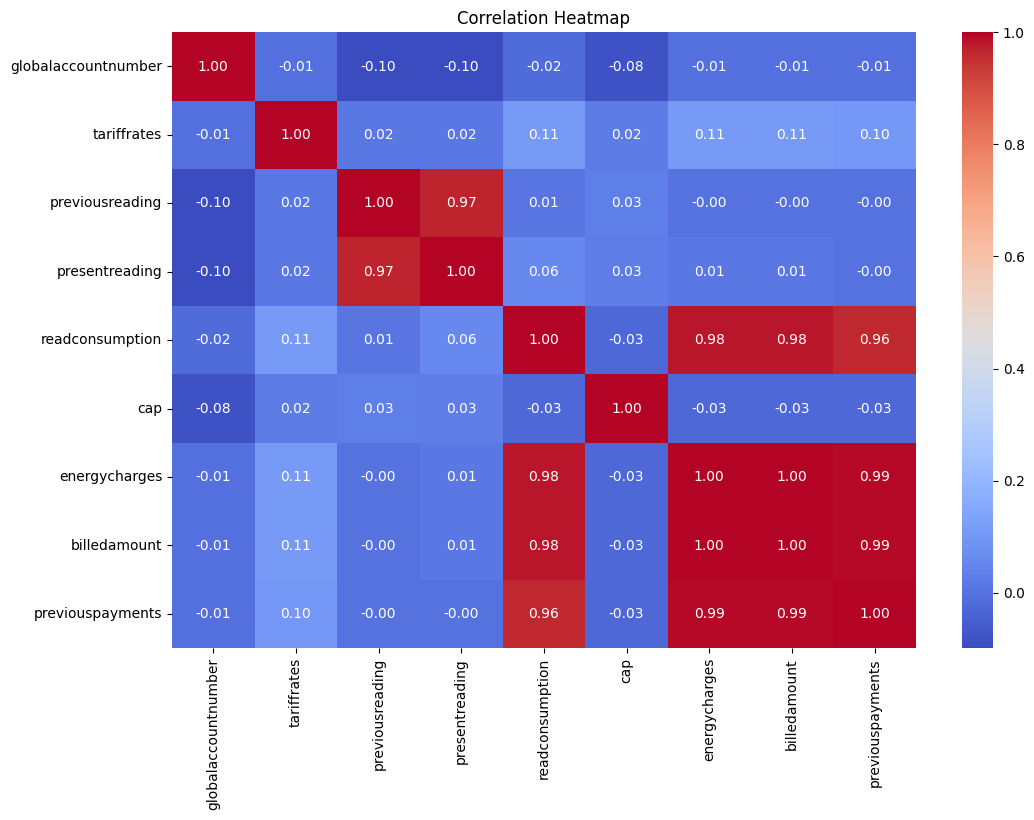

In [14]:
import seaborn as sns
correlation_matrix = numerical_col.corr()
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

Distribution of Tariff Class

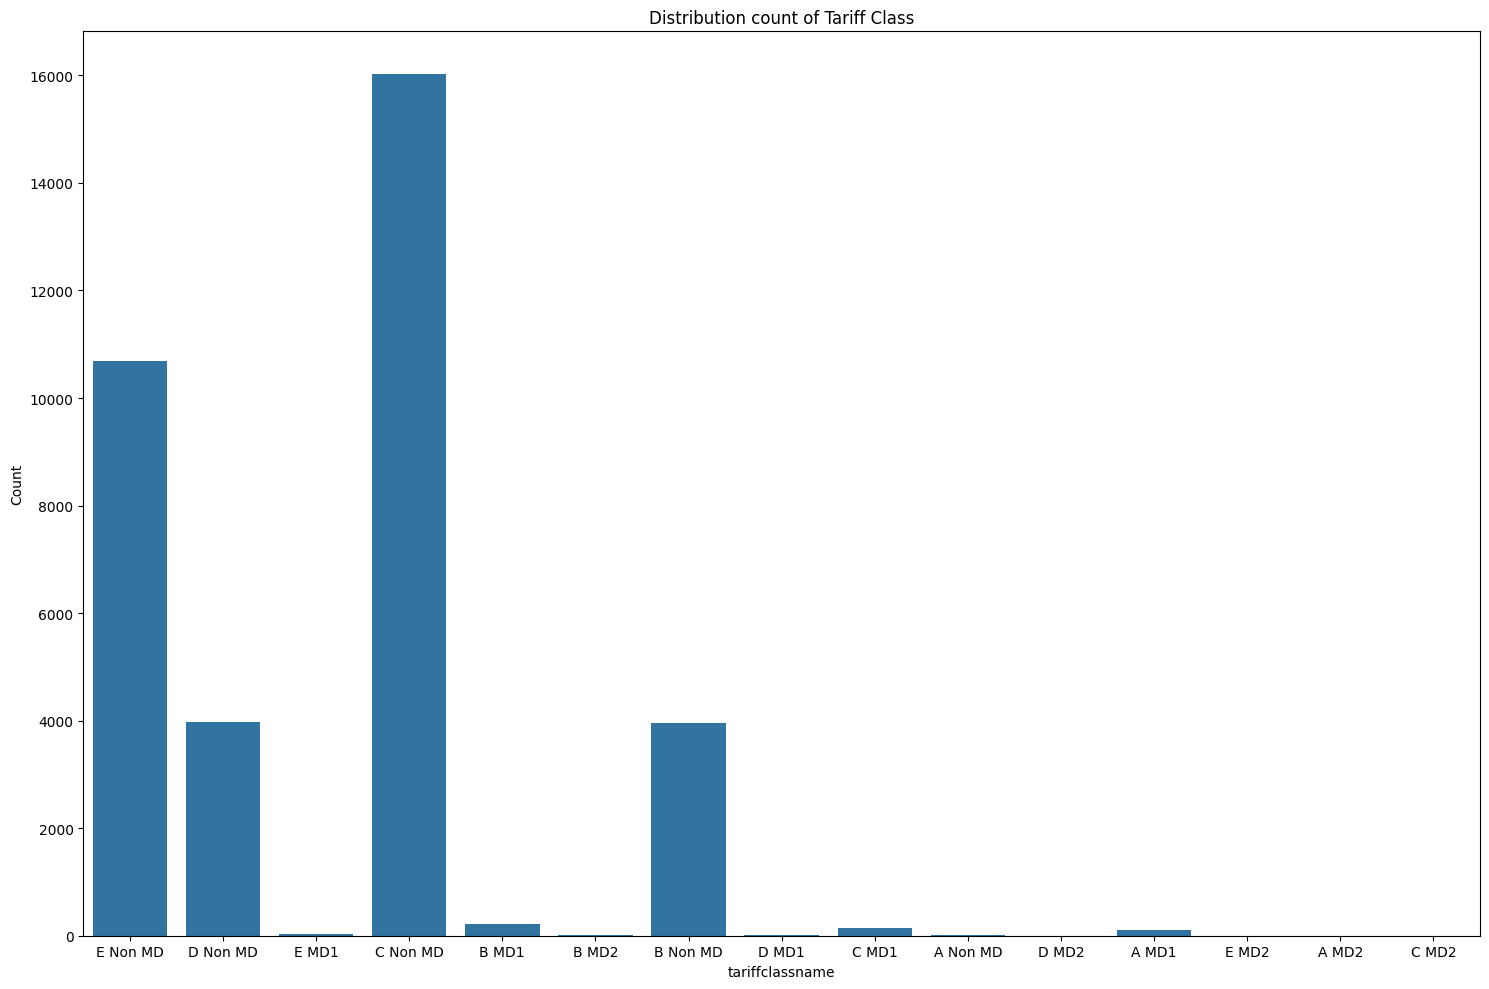

In [15]:
# Distribution of Tariff Class
plt.figure(figsize=(15, 10))
sns.countplot(x='tariffclassname', data=df)
plt.title('Distribution count of Tariff Class')
plt.xlabel('tariffclassname')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


The customer count of each Distridution Substation

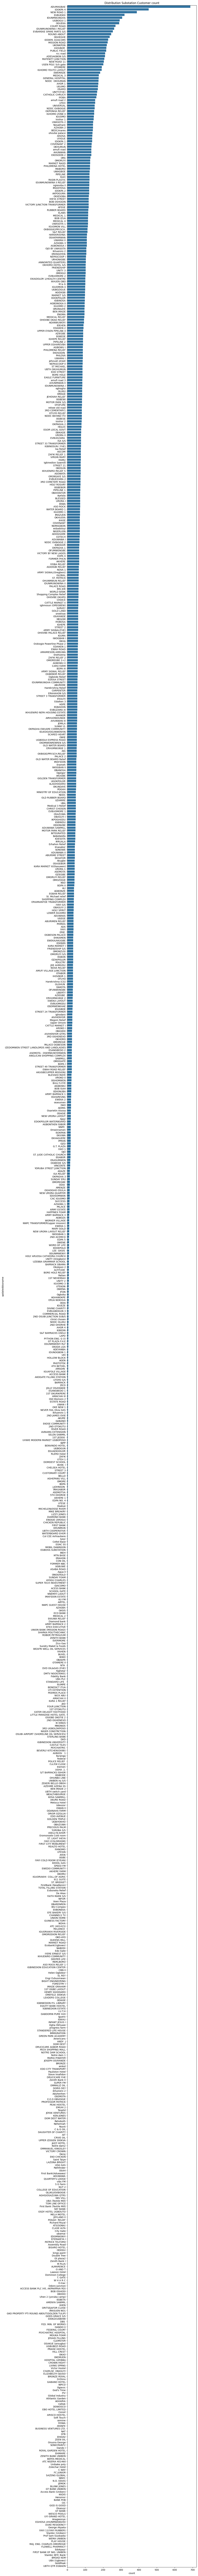

In [16]:
# Customer count analysis of Distribution Substation
plt.figure(figsize=(10, 200))
sns.countplot(y='updateddssname', data=df, order=df['updateddssname'].value_counts().index)
plt.title('Distribution Substation Customer count')
plt.show()

Compare total Energy charges with readconsumption for different tariff classes.

Insight: Shows whether the charges are proportionate to consumption within each tariff class, potentially revealing pricing inefficiencies.

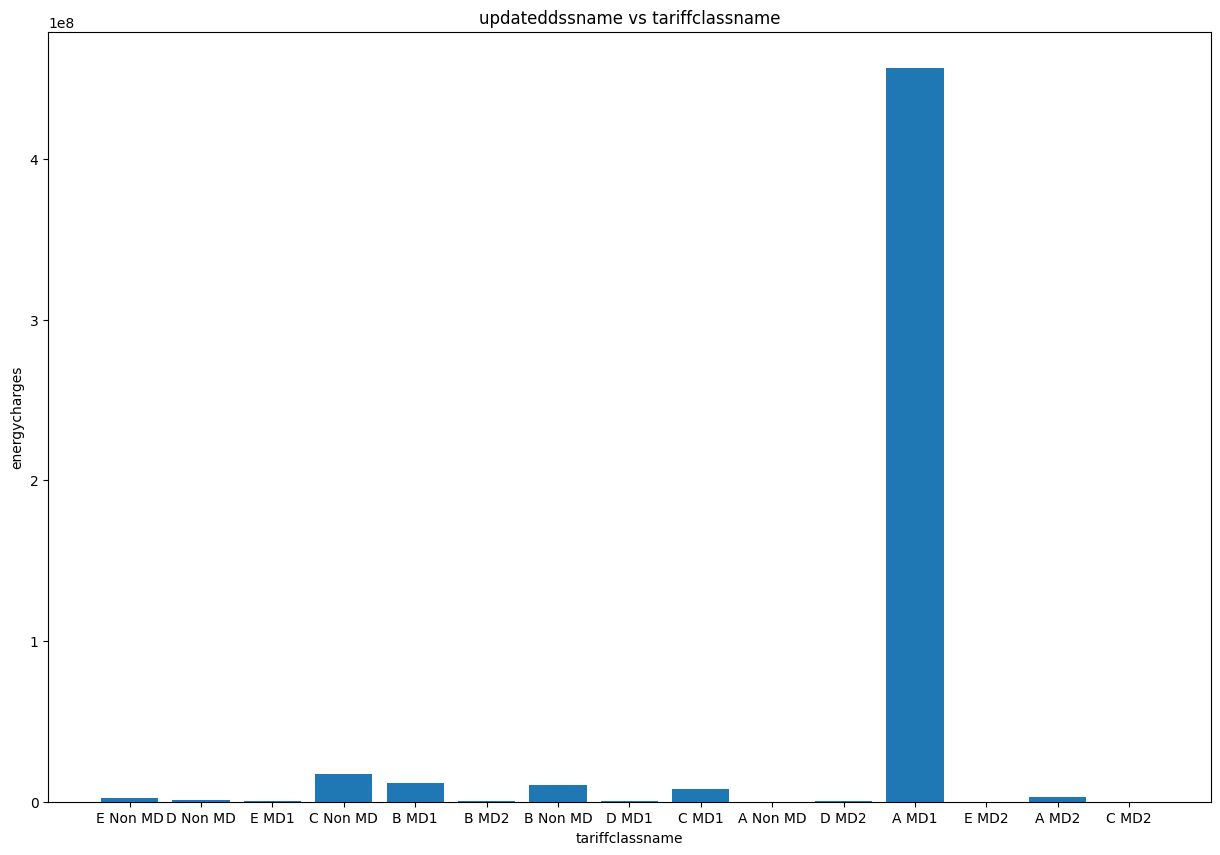

In [17]:
# Plotting Energy Charges vs Tariff Class
plt.figure(figsize=(15, 10))
plt.bar(df['tariffclassname'], df['energycharges'])
plt.xlabel('tariffclassname')
plt.ylabel('energycharges')
plt.title('updateddssname vs tariffclassname')
plt.show()

Creating a new filtered dataset to filter uptateddssname. This would enable us carefully investigate each of the Distribution Substations (DSS)

In [18]:
# Dataset to filter different Distribution Substation (DSS) names
df_filtered = df[df['updateddssname']=='AMENZE']

In [19]:
df_filtered

,globalaccountnumber,displaycode,tariffclassname,tariffrates,previousreading,presentreading,readconsumption,cap,energycharges,billedamount,previouspayments,updateddssname
15617,1075348740,D,E Non MD,41.21,0.0,0.0,25.0,249.0,1030.25,1107.51875,0.0,AMENZE
16090,46510,D,E Non MD,41.21,0.0,0.0,237.0,249.0,9766.77,10499.27775,7000.0,AMENZE
16232,786586258,D,E Non MD,41.21,0.0,0.0,25.0,249.0,1030.25,1107.51875,0.0,AMENZE
16321,893202,D,E Non MD,41.21,0.0,0.0,280.0,249.0,11538.80,12404.21000,15000.0,AMENZE
16480,911161,D,E Non MD,41.21,0.0,0.0,280.0,249.0,11538.80,12404.21000,15000.0,AMENZE
16791,886626,D,E Non MD,41.21,0.0,0.0,280.0,249.0,11538.80,12404.21000,20000.0,AMENZE
16910,9955743584,D,E Non MD,41.21,0.0,0.0,25.0,249.0,1030.25,1107.51875,12000.0,AMENZE
16982,7343921804,D,E Non MD,41.21,0.0,0.0,25.0,249.0,1030.25,1107.51875,0.0,AMENZE
17057,931225,D,E Non MD,41.21,0.0,0.0,280.0,249.0,11538.80,12404.21000,4000.0,AMENZE
17074,7356921632,D,E Non MD,41.21,0.0,0.0,20.0,249.0,824.20,886.01500,10000.0,AMENZE


Show the breakdown of previouspayments compared to billedamount to identify payment behaviors (whether customers are paying their bills in full, partially, or not at all).

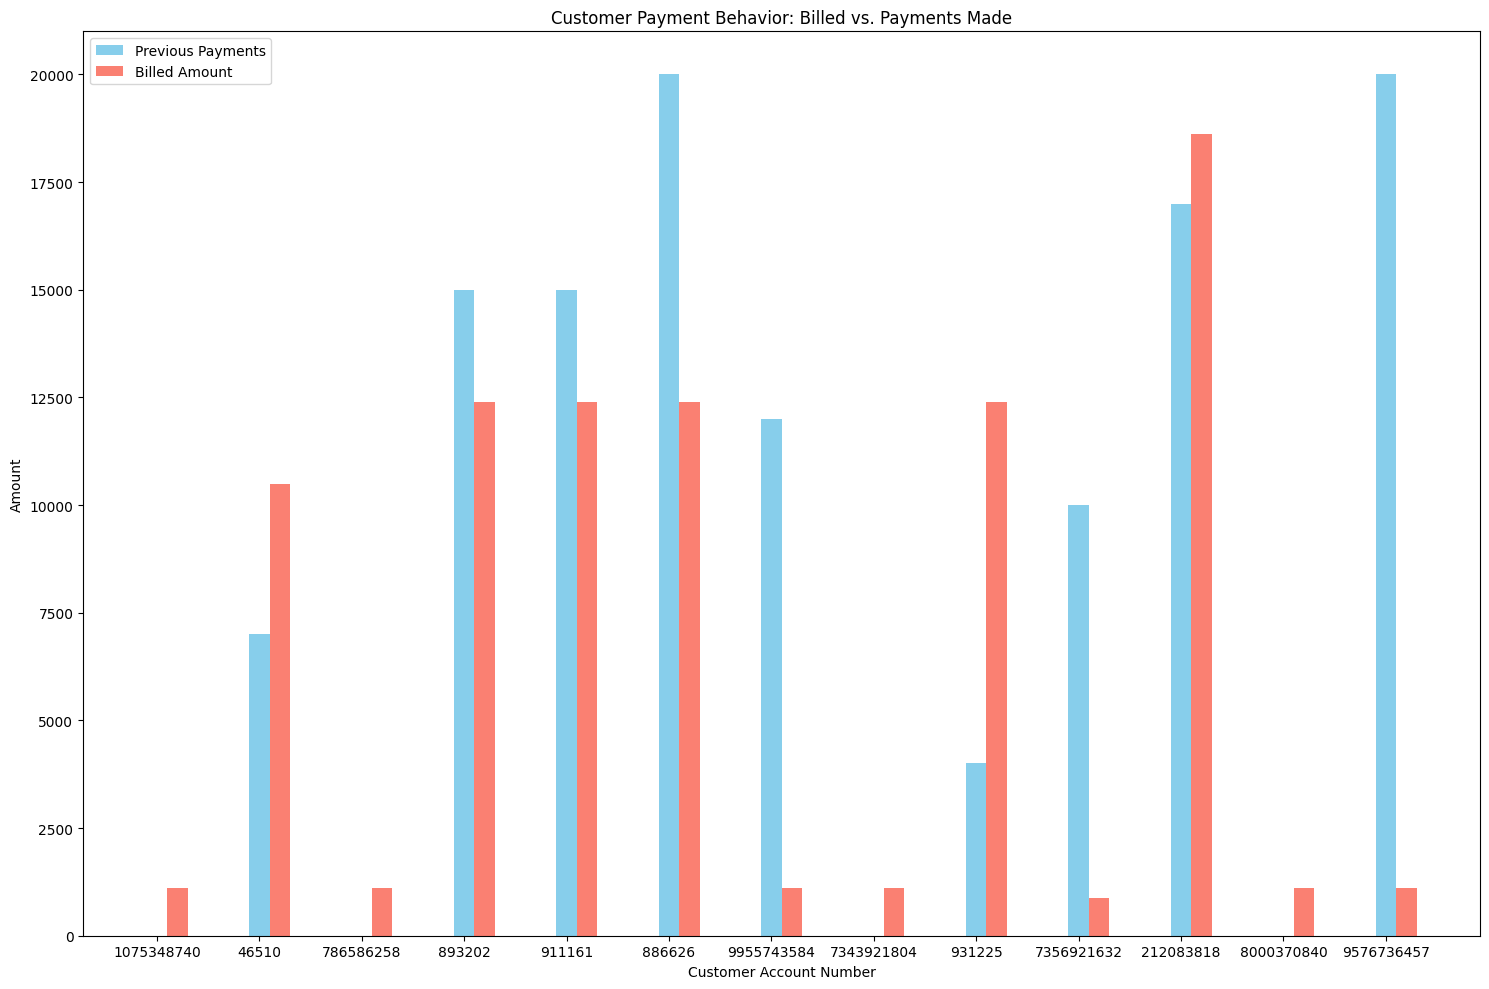

In [20]:



# Set up bar width and positions
bar_width = 0.2
x = np.arange(len(df_filtered))
y = [i+bar_width for i in x]

# Plot Stacked Bar Chart
fig, ax = plt.subplots(figsize=(15, 10))

# Plot Previous Payments
ax.bar(x, df_filtered['previouspayments'], bar_width, label='Previous Payments', color='skyblue')

# Plot Billed amount
ax.bar(y, df_filtered['billedamount'], bar_width,  label='Billed Amount', color='salmon')

# Labeling and Formatting
ax.set_xlabel('Customer Account Number')
ax.set_ylabel('Amount')
ax.set_title('Customer Payment Behavior: Billed vs. Payments Made')
ax.set_xticks(x)
ax.set_xticklabels(df_filtered['globalaccountnumber'])
#ax.set_yticklabels(df_filtered['billedamount'])
ax.legend()

# Display plot
plt.tight_layout()
plt.show()

Scatter Plot for the Read Consumption and Billed Amount for the entire dataset

<ipython-input-23-a05cacedfe80>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(df['readconsumption'], df['billedamount'], vmin=0, vmax=100, cmap='rainbow')


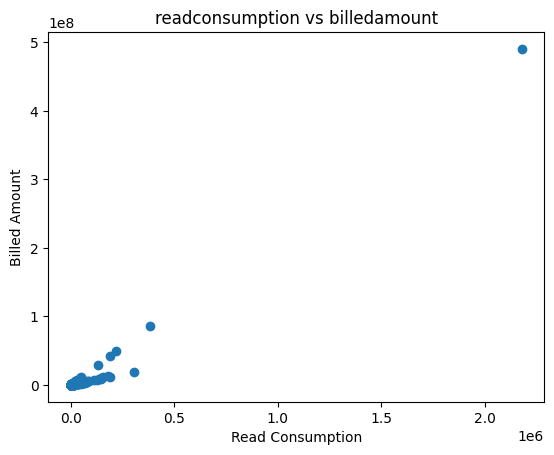

In [23]:
# Scatter plot to show the relationship between readconsumption and billedamount
plt.scatter(df['readconsumption'], df['billedamount'], vmin=0, vmax=100, cmap='rainbow')
plt.xlabel('Read Consumption')
plt.ylabel('Billed Amount')
plt.title('readconsumption vs billedamount')
plt.show()

<ipython-input-26-6e80e72a310b>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(df['energycharges'], df['billedamount'], vmin=0, vmax=100, cmap='rainbow')


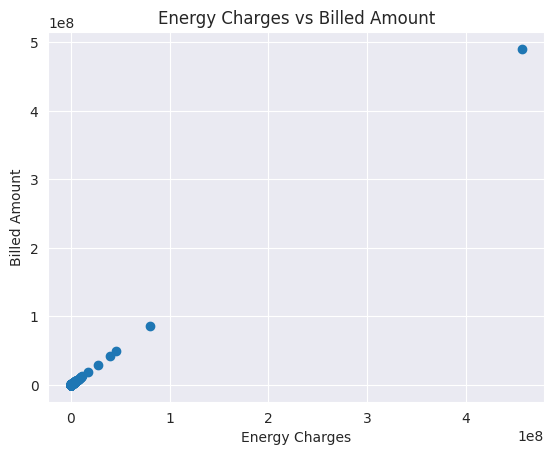

In [26]:
# Scatter plot for Billed Amount and Energy Charges
sns.set_style('darkgrid')
plt.scatter(df['energycharges'], df['billedamount'], vmin=0, vmax=100, cmap='rainbow')
plt.xlabel('Energy Charges')
plt.ylabel('Billed Amount')
plt.title('Energy Charges vs Billed Amount')
plt.show()

Scatter Plot for the Read Consuption and Billed Amount for a filtered Distriution Substation

<ipython-input-28-9cfbe7bcb9e8>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(df_filtered['readconsumption'], df_filtered['billedamount'], vmin=0, vmax=100, cmap='rainbow')


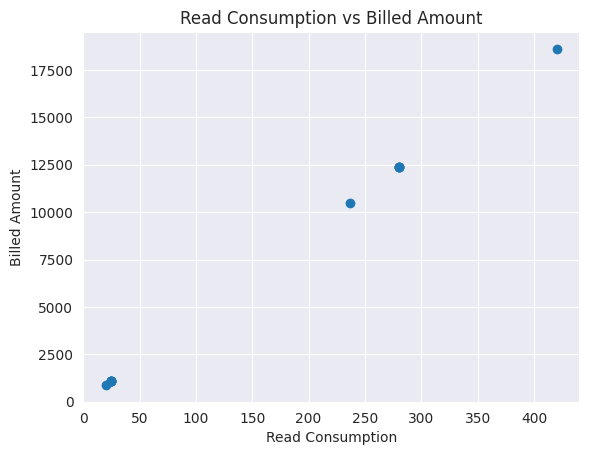

In [28]:
# Scatter plot for Billed Amount and Read Consuption for a particular Distribution Substation

plt.scatter(df_filtered['readconsumption'], df_filtered['billedamount'], vmin=0, vmax=100, cmap='rainbow')
plt.xlabel('Read Consumption')
plt.ylabel('Billed Amount')
plt.title('Read Consumption vs Billed Amount')
plt.show()

<ipython-input-25-a2ab21c50296>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(df_filtered['energycharges'], df_filtered['billedamount'], vmin=0, vmax=100, cmap='rainbow')


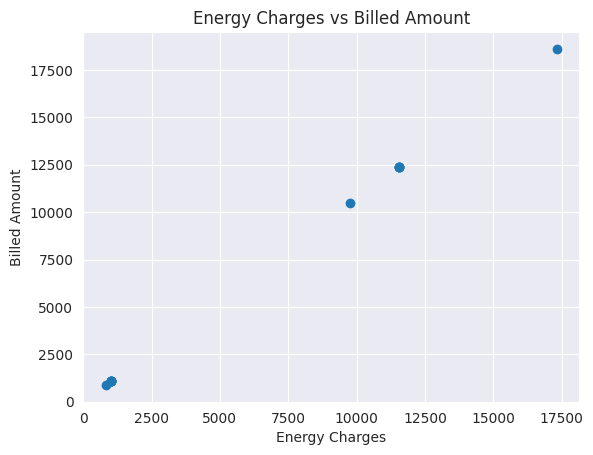

In [25]:
sns.set_style('darkgrid')
plt.scatter(df_filtered['energycharges'], df_filtered['billedamount'], vmin=0, vmax=100, cmap='rainbow')
plt.xlabel('Energy Charges')
plt.ylabel('Billed Amount')
plt.title('Energy Charges vs Billed Amount')
plt.show()

Encoding the catigorical features

In [29]:
# define the transformation
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical", # --> name of the transformation
            OneHotEncoder(sparse_output=False, handle_unknown='ignore'), # --> main function to apply
            categorical_columns, #-->columns to apply it to
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False
)

# the output is an ARRAY with the encoded columns.
encoded_array= ct_cat.fit_transform(df)

# What if we want a dataframe back? We can combine the array with the info about
# the column names stored in ct.get_feature_names_out()
encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)

df= pd.DataFrame(encoded_array, columns=encoded_col_names)

print()
print(df.head(5))

['displaycode_D' 'displaycode_M' 'displaycode_R' 'displaycode_STORED_AVG'
 'tariffclassname_A MD1' 'tariffclassname_A MD2'
 'tariffclassname_A Non MD' 'tariffclassname_B MD1'
 'tariffclassname_B MD2' 'tariffclassname_B Non MD'
 'tariffclassname_C MD1' 'tariffclassname_C MD2'
 'tariffclassname_C Non MD' 'tariffclassname_D MD1'
 'tariffclassname_D MD2' 'tariffclassname_D Non MD'
 'tariffclassname_E MD1' 'tariffclassname_E MD2'
 'tariffclassname_E Non MD' 'updateddssname_ FED. MIN. OF WORKS'
 'updateddssname_03062016B098' 'updateddssname_1ST JEDDO '
 'updateddssname_1ST NEHEMIAH' 'updateddssname_1ST OGBE LAYOUT'
 'updateddssname_1ST OKURIKPERE' 'updateddssname_1ST OTOKUTU'
 'updateddssname_2ND ACEMCO' 'updateddssname_2ND JAMES OVIE'
 'updateddssname_2ND OGHENEVO' 'updateddssname_2ND OHORHE'
 'updateddssname_2ND OSUBI JUNCTION SUB/S' 'updateddssname_2ND OTOKUTU'
 'updateddssname_3RD CEMENTARY1' 'updateddssname_3RD CEMETERY ROAD'
 'updateddssname_3RD OGHENEVO' 'updateddssname_3RD UGBOLOKPOS

Machine Learning Model Implementation

In [30]:
# Out target feature is the Billed Amount
X = df.drop('billedamount', axis=1)
y = df['billedamount']

In [31]:
print (X.shape)
print (y.shape)

(35189, 960)
(35189,)


In [32]:
print (y.head(5))

0    4430.07500
1    2215.03750
2    2215.03750
3    2215.03750
4    9436.05975
Name: billedamount, dtype: float64


In [33]:
# separating of training and testing set: 80-20 separation
# random_state parameter is given to keep the same randomised splitting: important when you are creating the model
# and want to keep a specific separation across multiple runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle= True, random_state=42)


In [34]:
# initialise an instance of a linear regression model
lr = SGDRegressor()
lr.fit(X_train, y_train) # train the model on our training dataset
print('this is the training data')
print(X_train)

this is the training data
       displaycode_D  displaycode_M  displaycode_R  displaycode_STORED_AVG  \
31526            1.0            0.0            0.0                     0.0   
31479            1.0            0.0            0.0                     0.0   
3921             1.0            0.0            0.0                     0.0   
8960             1.0            0.0            0.0                     0.0   
10448            1.0            0.0            0.0                     0.0   
...              ...            ...            ...                     ...   
16850            0.0            1.0            0.0                     0.0   
6265             1.0            0.0            0.0                     0.0   
11284            1.0            0.0            0.0                     0.0   
860              1.0            0.0            0.0                     0.0   
15795            1.0            0.0            0.0                     0.0   

       tariffclassname_A MD1  tariffc

Evaluating our model performance using Root Mean Squared Error

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for training set
# get the predictions
y_train_predict = lr.predict(X_train)
# compare predicted and true labels using the RMSE performance metrics.
rmse = np.sqrt(mean_squared_error(y_train, y_train_predict))
r2 = r2_score(y_train, y_train_predict)

print("Training SET")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))



# model evaluation for testing set
y_test_predict = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))


print("\nTesting SET")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))



Training SET
--------------------------------------
RMSE is 1.283502342000209e+27

Testing SET
--------------------------------------
RMSE is 1.2961457567951936e+27


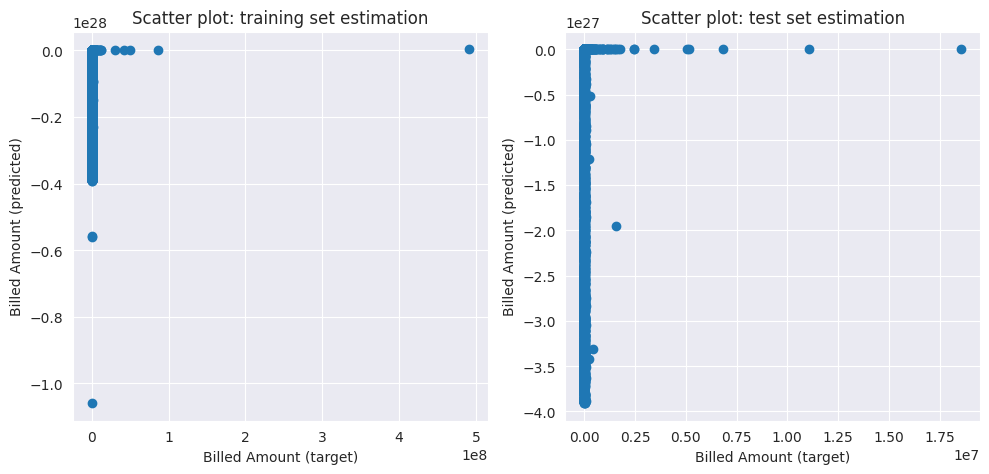

In [36]:
from scipy.stats import norm

_ = plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
_ = ax1.scatter(y_train, y_train_predict)
_ = ax1.set_title('Scatter plot: training set estimation')
_ = ax1.set_xlabel('Billed Amount (target)')
_ = ax1.set_ylabel('Billed Amount (predicted)')

ax2 = plt.subplot(122)
_ = ax2.scatter(y_test, y_test_predict)
_ = ax2.set_title('Scatter plot: test set estimation')
_ = ax2.set_xlabel('Billed Amount (target)')
_ = ax2.set_ylabel('Billed Amount (predicted)')


plt.tight_layout()
plt.show()


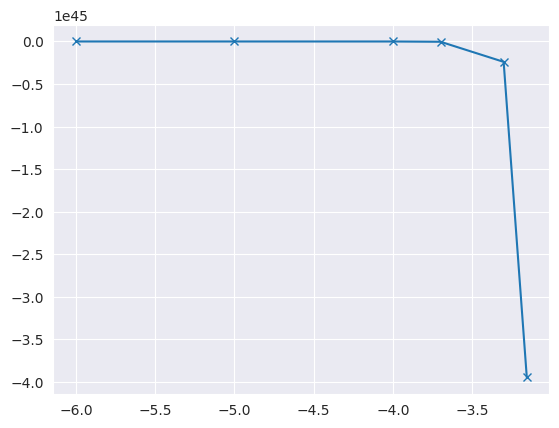

In [37]:
# Let's keep working with X_train and X_test from before.
learning_rates_to_try = [0.000001, 0.00001, 0.0001, 0.0002, 0.0005, 0.0007] #...] #how many do you want to try?

# Your turn now! Reimplement the above in a for loop, store all the results and take the maximum
all_results = []

# your code here
# I'll get you started with the structure
#for loop

# create and train model: remember that the argument to change is called eta0

# predict labels

# evaluate and store results

for i, e0 in enumerate(learning_rates_to_try):
    lr = SGDRegressor(learning_rate= 'constant', eta0= e0)
    lr.fit(X_train, y_train)
    y_test_predict = lr.predict(X_test)
    r2 = r2_score(y_test, y_test_predict)
    all_results.append(r2)

plt.plot(np.log10(learning_rates_to_try), all_results, '-x')